In [5]:
%config IPCompleter.greedy=True 
import dicom #read the dicom files
import os #do directory operations
import pandas as pd #nice for data analysis

data_dir = '/Volumes/USB_DRIVE/Data Science Bowl/stage1/stage1/' #directory for the data
patients = os.listdir(data_dir) # get all items inside of folder
labels_df = pd.read_csv('stage1_labels.csv', index_col=0) # put into dataframe

labels_df.head()

,cancer
id,
0015ceb851d7251b8f399e39779d1e7d,1
0030a160d58723ff36d73f41b170ec21,0
003f41c78e6acfa92430a057ac0b306e,0
006b96310a37b36cccb2ab48d10b49a3,1
008464bb8521d09a42985dd8add3d0d2,1


In [8]:
%config IPCompleter.greedy=True 
for patient in patients[:1]: # this is making a list containing only the first patient
    label = labels_df.get_value(patient, 'cancer')
    path = data_dir + patient # path to dicom files for patient
    slices = [dicom.read_file(path + '/' + s) for s in os.listdir(path)] # reading in all the dicom files for patient
    #x is the dicom file
    slices.sort(key = lambda x: float(x.ImagePositionPatient[2])) # This sorts the dicom files by the third value in image position patient attribute
    print(len(slices), slices[0].pixel_array.shape)
#     print(slices[0]) # this is the dicom file for the patient

195 (512, 512)


20


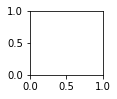

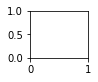

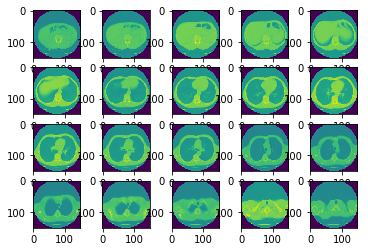

20


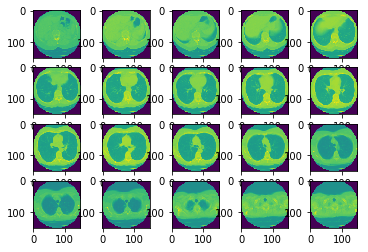

20


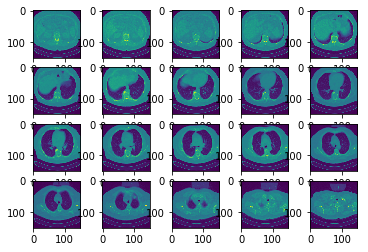

20


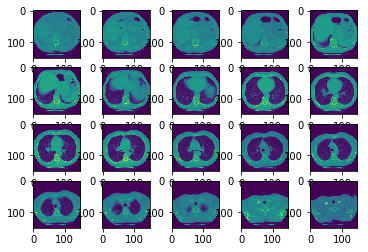

20


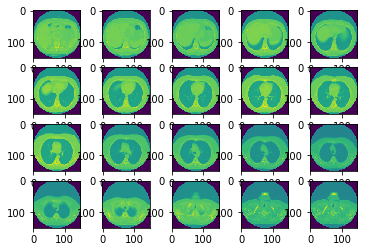

20


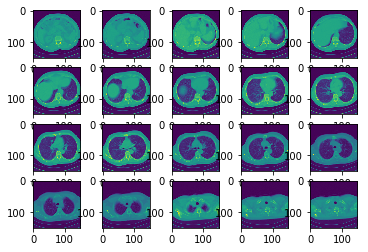

20


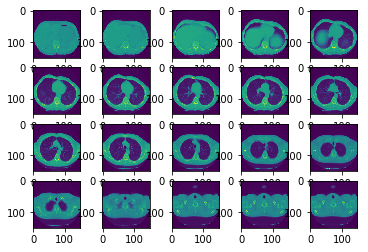

20


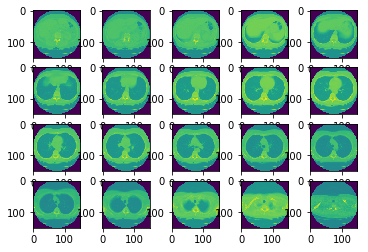

20


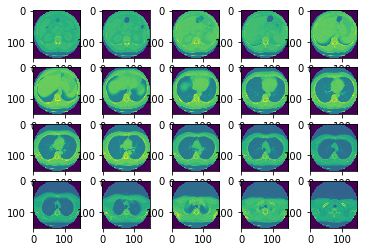

20


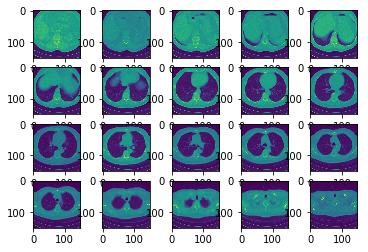

In [16]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import math

IMG_PX_SIZE = 150
HM_SLICES = 20

#make list into list of lists
def chunks(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]

def mean(l):
    return sum(l)/len(l)

for patient in patients[:10]: # this is making a list containing only the first patient
    label = labels_df.get_value(patient, 'cancer')
    path = data_dir + patient # path to dicom files for patient
    slices = [dicom.read_file(path + '/' + s) for s in os.listdir(path)] # reading in all the dicom files for patient
    #x is the dicom file
    slices.sort(key = lambda x: float(x.ImagePositionPatient[2])) # This sorts the dicom files by the third value in image position patient attribute
    
    new_slices = []
    slices = [cv2.resize(np.array(each_slice.pixel_array), (IMG_PX_SIZE, IMG_PX_SIZE)) for each_slice in slices]
    
    chunk_sizes = math.ceil(len(slices)/HM_SLICES)
    
    for slice_chunk in chunks(slices, chunk_sizes):
        slice_chunk = list(map(mean, zip(*slice_chunk)))
        new_slices.append(slice_chunk)
    
    if len(new_slices) == HM_SLICES - 1:
        new_slices.append(new_slices[-1])
        
    if len(new_slices) == HM_SLICES - 2:
        new_slices.append(new_slices[-1])
        new_slices.append(new_slices[-1])
    
    if len(new_slices) == HM_SLICES + 2:
        new_val = list(map(mean, zip(*[new_slices[HM_SLICES - 1], new_slices[HM_SLICES]])))
        del new_slices[HM_SLICES]
        new_slices[-1] = new_val
    
    if len(new_slices) == HM_SLICES + 1:
        new_val = list(map(mean, zip(*[new_slices[HM_SLICES - 1], new_slices[HM_SLICES]])))
        del new_slices[HM_SLICES]
        new_slices[-1] = new_val
    
    print(len(new_slices))
    
    fig = plt.figure()
    for num, each_slice in enumerate(new_slices): #getting the index and slice for the first 12 slices
        y = fig.add_subplot(4, 5, num + 1)
        y.imshow(each_slice)
    plt.show()